# CONFETTI Demo Notebook

Counterfactual explanations provide an intuitive way to understand how a model’s prediction could change by minimally altering the input.
Given an instance and a target class, a counterfactual answers the question:
> *“What is the smallest and most plausible change in the input time series that would make the model predict a different outcome?”*

For multivariate time series, this often involves modifying only a short subsequence or specific features while keeping the rest of the signal intact. Counterfactuals complement traditional attribution methods by not only highlighting **why** a decision was made, but also illustrating **how** it could have been different.


This notebook demonstrates the full CONFETTI pipeline for generating such counterfactual explanations on multivariate time series, including:

- loading a trained model
- preparing a dataset
- optionally computing CAM feature weights
- generating counterfactual instances
- visualizing the resulting explanations

The goal is to provide a clear and minimal example of how CONFETTI can be used in practice.

To run this notebook, first generate the toy dataset and train the toy model using the scripts provided in the repository.
These scripts ensure that all files are created in the correct folder structure.

In [3]:
!python ../examples/scripts/generate_toy_dataset.py

Saved toy dataset to /Users/alan.paredes/Desktop/confetti/examples/data


In [8]:
!python ../examples/scripts/train_toy_model.py

Dataset shapes:
  X_train: (160, 100, 3)
  y_train: (160,)
  X_test: (40, 100, 3)
  y_test: (40,)

Training ToyFCN model...
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9803 - loss: 0.4591 - val_accuracy: 1.0000 - val_loss: 0.5882
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2277 - val_accuracy: 1.0000 - val_loss: 0.4698
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1251 - val_accuracy: 1.0000 - val_loss: 0.3767
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0885 - val_accuracy: 1.0000 - val_loss: 0.3218
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0756 - val_accuracy: 1.0000 - val_loss: 0.2825
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0653 - val_accuracy: 1.0000 - val_loss: 0.2477
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0631 - val_accuracy: 1.0000 - val_loss: 0.2217
Epoch 8

## Generate Counterfactual Explanations for Multivariate Time Series with CONFETTI

Below, we illustrate the complete workflow using the toy dataset. Each section corresponds to one stage of the pipeline, from loading assets to visualizing the resulting explanations.

### 01. Imports

We start by importing the required modules, including the CONFETTI explainer and simple visualization utilities for plotting time series and counterfactuals.

In [1]:
from pathlib import Path
import keras

from confetti import CONFETTI
from confetti.visualizations import (
    plot_time_series,
    plot_counterfactual
)

from confetti.utils import load_multivariate_ts_from_csv

In [2]:
ROOT = Path("../examples")

DATA_SCRIPT = ROOT / "scripts" / "generate_toy_dataset.py"
TRAIN_SCRIPT = ROOT / "scripts" / "train_toy_model.py"

DATA_TRAIN_PATH = ROOT / "data" / "toy_train.csv"
DATA_TEST_PATH = ROOT / "data" / "toy_test.csv"
MODEL_PATH = ROOT / "models" / "toy_fcn.keras"

### 02. Load Model

We load the trained Keras model from disk.

In [3]:
model = keras.models.load_model(MODEL_PATH)
print("Model loaded:", MODEL_PATH)

Model loaded: ../examples/models/toy_fcn.keras


### 03. Load Data

Next, we load the multivariate time series dataset.
The utility function returns the data in ``(n_samples, time_steps, n_features)`` format together with class labels.

In [4]:
X_train, y_train = load_multivariate_ts_from_csv(str(DATA_TRAIN_PATH))
X_test, y_test = load_multivariate_ts_from_csv(str(DATA_TEST_PATH))

print("Dataset loaded.")
print("Shape:", X_train.shape, y_train.shape)
print("Example sample shape:", X_train[0].shape)


Dataset loaded.
Shape: (160, 100, 3) (160,)
Example sample shape: (100, 3)


### 04. Optional: Compute CAM Feature Weights

CONFETTI can incorporate CAM-based feature importance weights when generating counterfactual explanations.
This step is optional, but typically recommended when the model is compatible with CAM extraction.

In [5]:
from confetti.attribution import cam
training_weights = cam(model, X_train)

If no CAM is available, simply do not provide any training weights to the parameter ``reference_weights`` in the next step, or set it to ``None``:

### 05. Generate Counterfactual Explanations

We select a single test instance and plot it for inspection.
CONFETTI is then initialized and used to generate a set of counterfactual candidates.

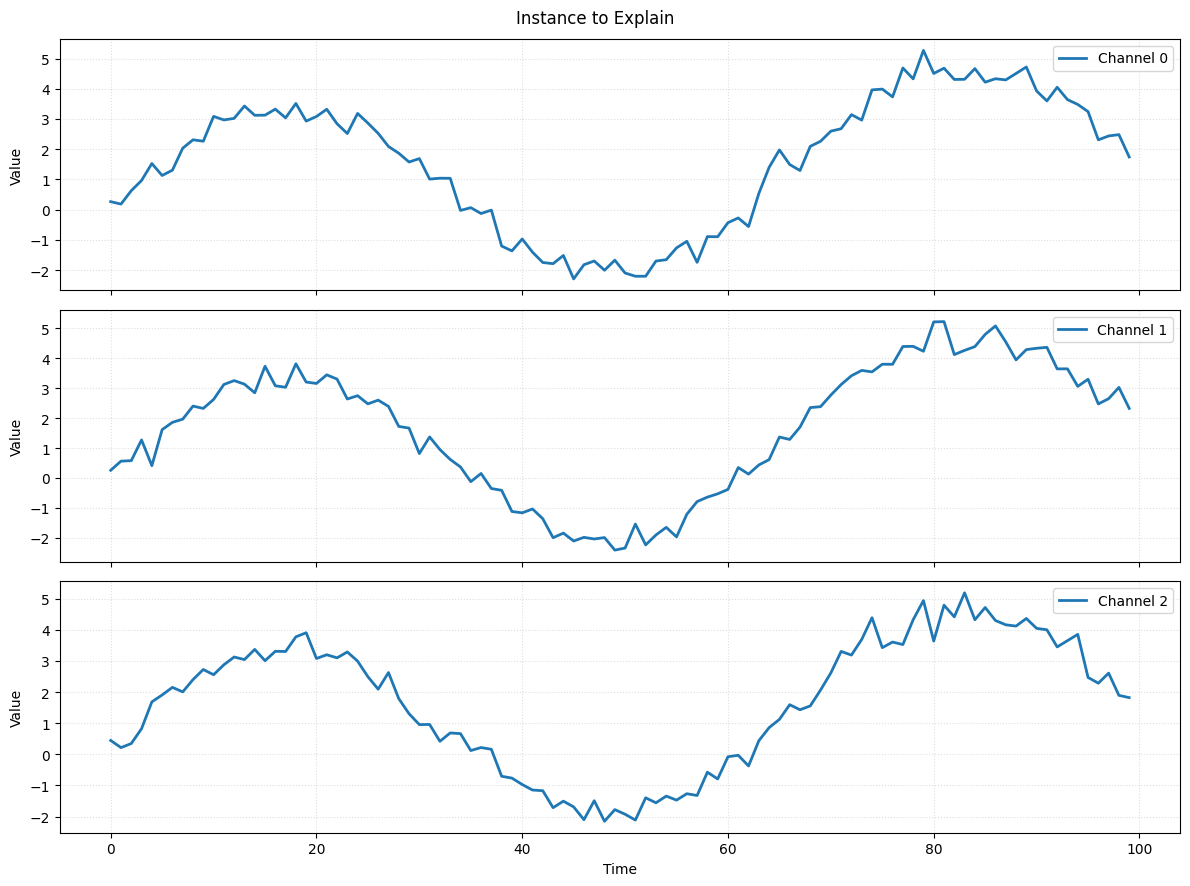

In [6]:
instance_to_explain = X_test[0:1]
plot_time_series(series=instance_to_explain, title="Instance to Explain")

In [7]:
explainer = CONFETTI(model_path=MODEL_PATH)

ce_results = explainer.generate_counterfactuals(
    instances_to_explain=instance_to_explain,
    reference_data=X_train,
    reference_weights=training_weights,
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9

The returned ``CounterfactualResults`` object contains several attributes, including the original instance, generated candidates, the best counterfactual, and CAM importance values (when available).

###  Visualize the Explanation

The notebook concludes by visualizing:

- the counterfactual instance
- the CAM heatmap overlay
- the best counterfactual as a standalone multivariate time series

These visualizations help illustrate which subsequences were modified and how they contributed to achieving the desired class change.

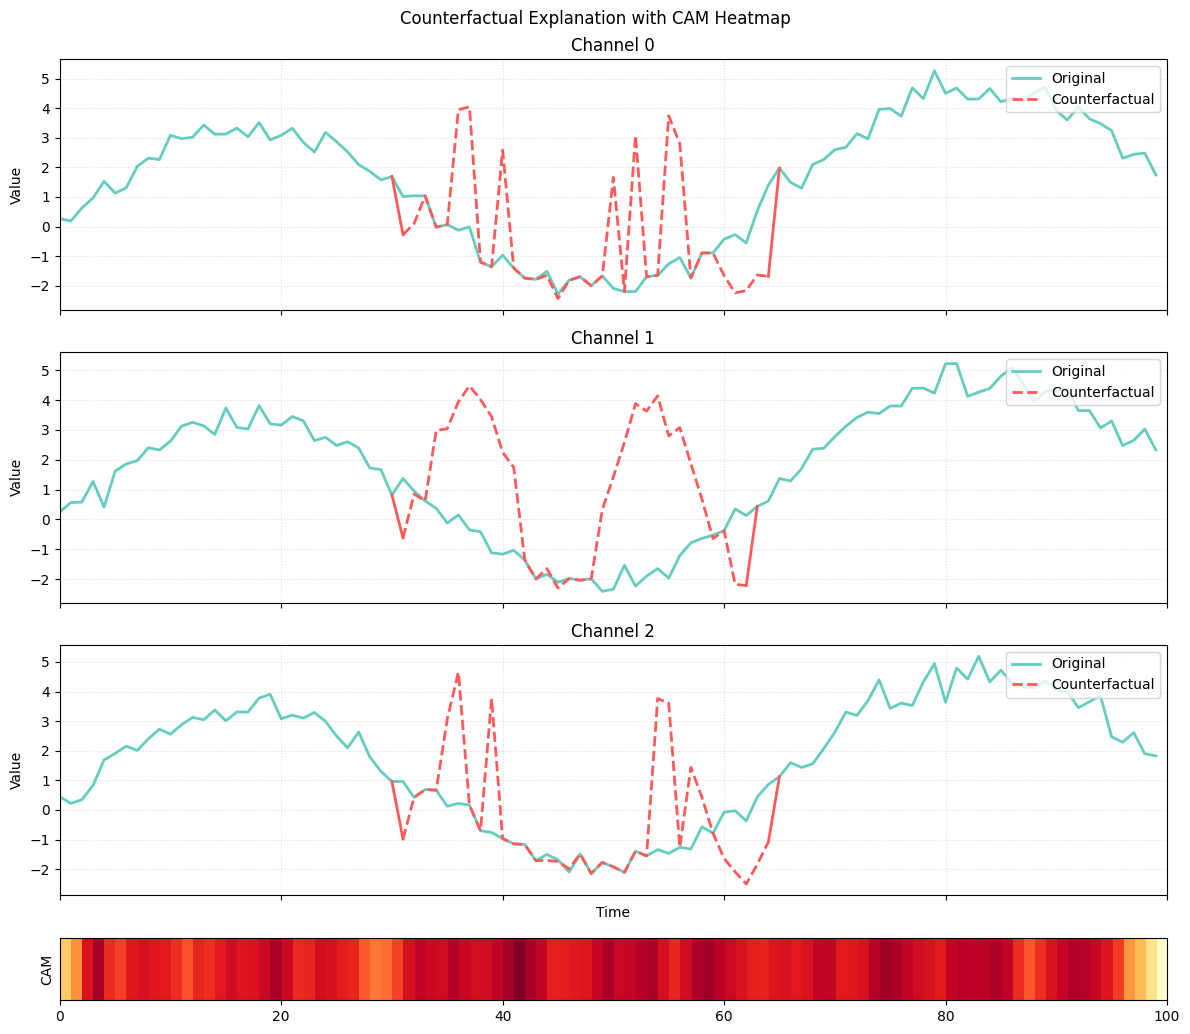

In [8]:
plot_counterfactual(original=ce_results[0].original_instance,
                    counterfactual=ce_results[0].best,
                    cam_weights=ce_results[0].feature_importance,
                    cam_mode="heatmap",
                    title="Counterfactual Explanation with CAM Heatmap")

The plot shows how CONFETTI generates a counterfactual by selectively modifying only the most relevant part of the time series. The green curves represent the original instance across all channels, while the red curves show the counterfactual subsequence inserted by the method. The heatmap at the bottom corresponds to the class activation map (CAM) of the nearest unlike neighbor (NUN), which indicates the time region the model relies on most when predicting the *new* class. CONFETTI uses this CAM as a guide, focusing its perturbation on the segment most responsible for distinguishing the NUN’s class from the original. The alignment between the high-activation region in the CAM and the red counterfactual subsequence illustrates how the method leverages attribution to produce focused and meaningful counterfactual changes.

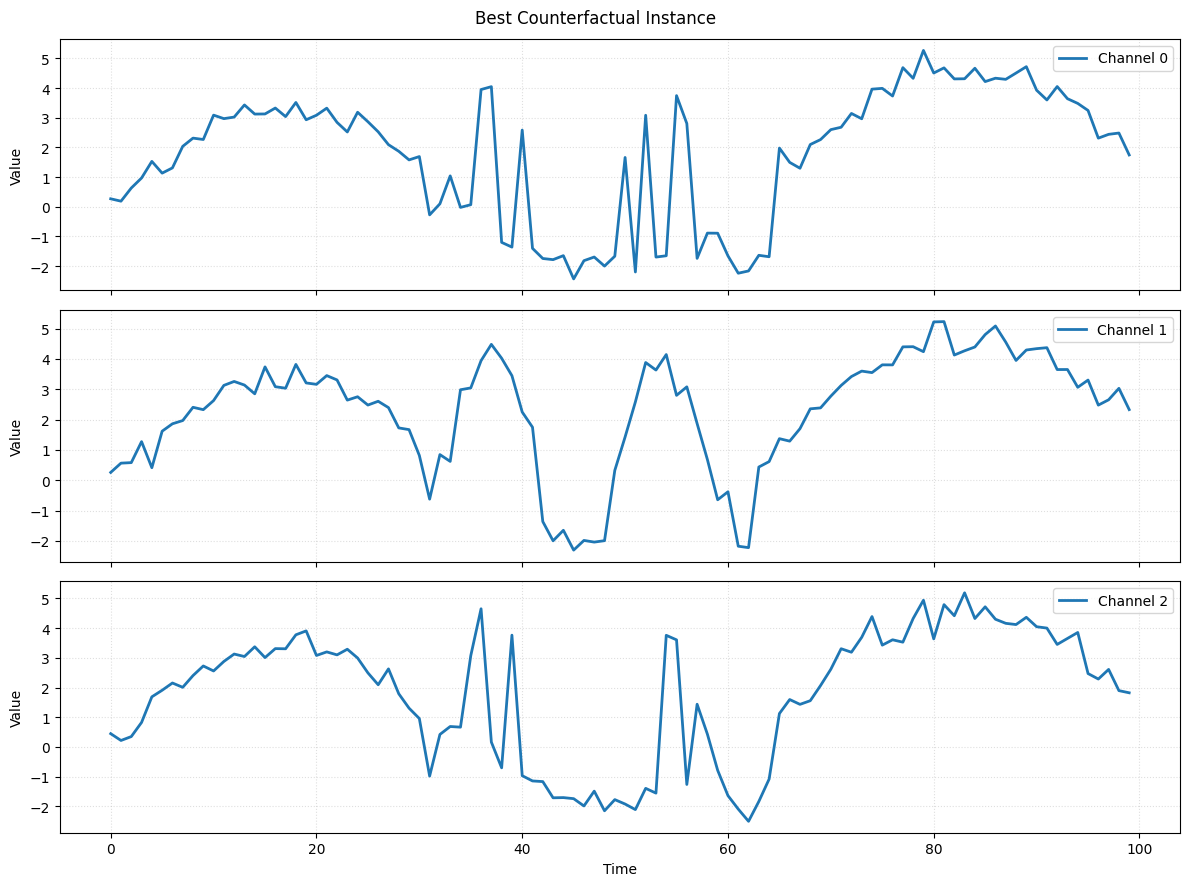

In [9]:
plot_time_series(ce_results[0].best, title="Best Counterfactual Instance")